# Dealing with missing data

In [1]:
import pandas as pd
titanic_data = pd.read_csv('tested.csv')

In [2]:
titanic_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [3]:
titanic_data.shape

(418, 12)

In [4]:
# making copy of titanic data
titanic_data_1 = titanic_data.copy()

In [5]:
titanic_data_1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [6]:
# complete case analysis
titanic_data_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
titanic_data_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# omiting columns with missing data
titanic_data_1 = titanic_data_1[['PassengerId', 
                                 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Embarked']]

In [9]:
titanic_data_1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,S


In [10]:
# working with avaliable data
# we would ignore the missing value
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Dropping missing data
titanic_data_2 = titanic_data.copy()

In [12]:
# Looking at the missing data
titanic_data_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# drop d cabin columns
titanic_data_2.drop(columns='Cabin',axis=1, inplace=True)

In [14]:
titanic_data_2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Data imputation - Retaining data

In [15]:
titanic_data_3 = titanic_data.copy() # make a copy

In [16]:
titanic_data_3.isna().sum() # checking missing value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
titanic_data_3['Age'].dtypes

dtype('float64')

In [18]:
mean_age = titanic_data_3.Age.mean() # mean of the age column

In [19]:
mean_age

30.272590361445783

In [20]:
median_age = titanic_data_3.Age.median() # median of the column

In [21]:
median_age

27.0

In [22]:
mode_age = titanic_data_3.Age.mode() # mode of the column

In [23]:
mode_age

0    21.0
1    24.0
Name: Age, dtype: float64

In [24]:
mode_age = mode_age.mean()

In [25]:
mode_age

22.5

In [26]:
titanic_data_3['Age'].head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10     NaN
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

In [27]:
# pandas method for filling missing data 
titanic_data_3['Age'].fillna(value=mean_age).head(20)

0     34.50000
1     47.00000
2     62.00000
3     27.00000
4     22.00000
5     14.00000
6     30.00000
7     26.00000
8     18.00000
9     21.00000
10    30.27259
11    46.00000
12    23.00000
13    63.00000
14    47.00000
15    24.00000
16    35.00000
17    21.00000
18    27.00000
19    45.00000
Name: Age, dtype: float64

In [28]:
titanic_data_3['Age'].fillna(value=median_age).head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    27.0
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

In [29]:
titanic_data_3['Age'].fillna(value=mode_age).head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    22.5
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

In [30]:
titanic_data_3['Age'].head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10     NaN
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

In [31]:
# pandas method for filling missing value
titanic_data_3.Age.ffill().head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    21.0
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

### Next observation carring Backward

In [32]:
titanic_data_3.Age.bfill().head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    46.0
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

# linear interpolation

In [33]:
# import numpy
import numpy as np

In [34]:
s = pd.Series([0, 1, np.nan, 3]) # created a series with missing value

In [35]:
s # The series 

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64

In [36]:
s.interpolate() # imputting missing value using linear interpolation

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [37]:
titanic_data_3.Age.head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10     NaN
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

In [38]:
titanic_data_3.Age.interpolate().head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    33.5
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

In [39]:
titanic_data_3['Age'].tail(20)

398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408     NaN
409     3.0
410     NaN
411    37.0
412    28.0
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, dtype: float64

In [40]:
titanic_data_3['Age'].fillna(-777).tail(20)

398     22.0
399     31.0
400     30.0
401     38.0
402     22.0
403     17.0
404     43.0
405     20.0
406     23.0
407     50.0
408   -777.0
409      3.0
410   -777.0
411     37.0
412     28.0
413   -777.0
414     39.0
415     38.5
416   -777.0
417   -777.0
Name: Age, dtype: float64

# Outliers

In [41]:
list_salaries = [23000, 17000, 35000, 39000]

In [42]:
np.mean(list_salaries)

28500.0

In [43]:
list_salaries1 = [23000, 17000, 35000,39000, 1000000] # outliers

In [44]:
np.mean(list_salaries1)

222800.0

# Interquartertile Range Rule

In [45]:
# creat the dataframe
data_titanic = pd.read_csv('tested.csv')

In [46]:
data_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
# featured column
data_titanic['Age'].head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [48]:
# import visualization libraries
import seaborn as sns

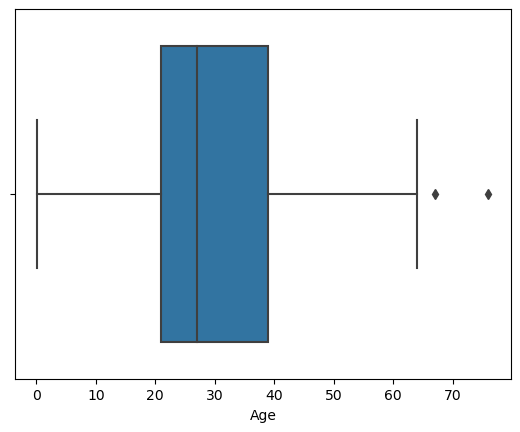

In [49]:
sns.boxplot(data=data_titanic, x='Age'); # boxplot

In [50]:
data_titanic['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


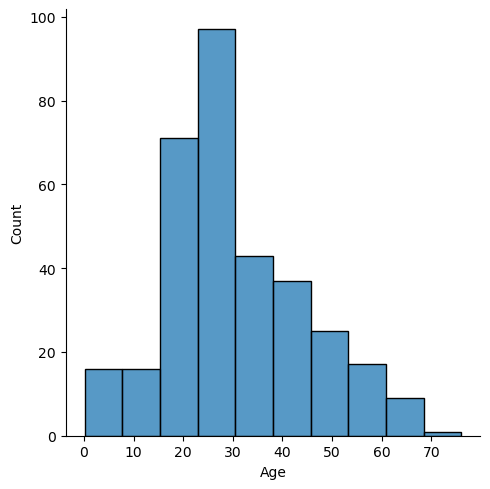

In [52]:
sns.displot(data=data_titanic, x='Age', bins=10, kde=False) # distribution plot

<Axes: xlabel='Age', ylabel='Fare'>

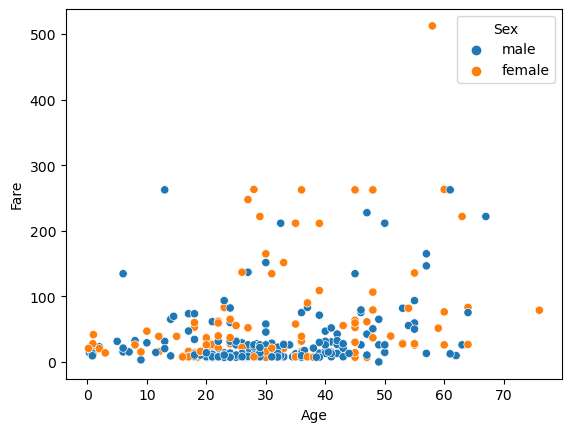

In [59]:
sns.scatterplot(data=data_titanic, x='Age', y='Fare', hue='Sex')

In [61]:
data_titanic.shape

(418, 12)

In [ ]:
# Tukey's
# Q1 - 1.5 * IQR = lower limit
# Q2 - 1.5 * IQR = upper limit

In [62]:
Q1 = data_titanic['Age'].quantile(.25)
Q3 = data_titanic['Age'].quantile(.75)
IQR = Q3 - Q1

In [63]:
IQR

18.0

In [65]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [68]:
lower_limit

-6.0

In [69]:
upper_limit

66.0

In [72]:
data_titanic['Age'].min()

0.17

In [74]:
outlier_upper = (data_titanic['Age'] > upper_limit)

In [75]:
 outlier_upper

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

In [77]:
len(data_titanic['Age']) - len(data_titanic['Age'][outlier_upper])

416

In [79]:
data_titanic_N = data_titanic[-(outlier_upper)]

In [80]:
data_titanic_N.shape

(416, 12)

In [81]:
data_titanic.shape

(418, 12)

In [84]:
data_titanic_N.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
data_titanic['Age'][outlier_upper]

81    67.0
96    76.0
Name: Age, dtype: float64

<Axes: xlabel='Age'>

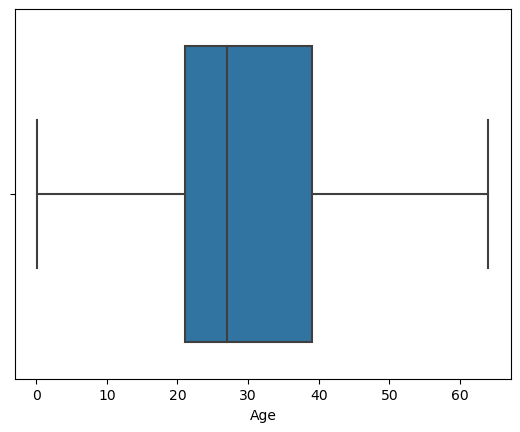

In [86]:
# visualiz data without outliers
sns.boxplot(data=data_titanic_N, x='Age')

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


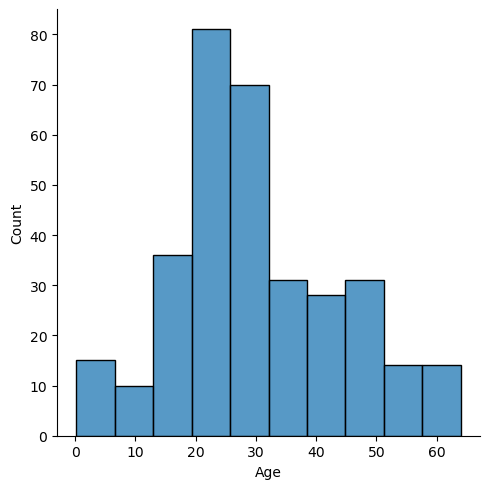

In [87]:
sns.displot(data=data_titanic_N, x='Age', bins=10, kde=False)

<Axes: xlabel='Age', ylabel='Fare'>

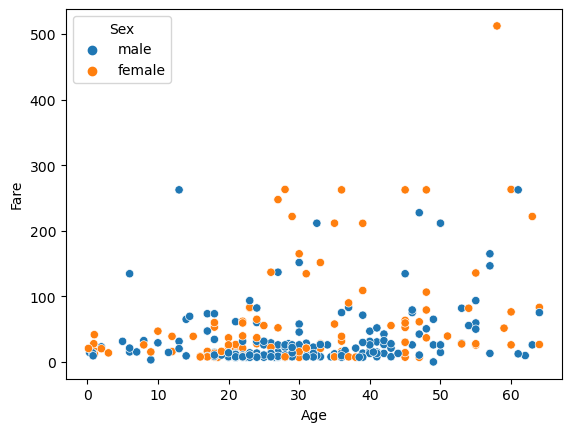

In [88]:
sns.scatterplot(data=data_titanic_N, x='Age', y='Fare', hue='Sex')

# Descriptive statistics